In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import roxbot.models as models
import math

In [2]:
def run_sim(robot, duration, dt=0.1) -> pd.DataFrame:
    """ run robot simulation for a duration"""

    t = []
    records = []

    for _ in range(int(duration/dt)):
        robot.step(dt)
        tl, tr = robot.wheel_targets
        rec = {"x": robot.xy.x, "y": robot.xy.y, 
               "theta": robot.theta, "velocity": robot.velocity,
                 "steering_angle": robot.steering_angle,
                 "vl": robot.wheels[0].velocity_ms, 
                 "vr": robot.wheels[1].velocity_ms,
                 "tl": tl, "tr": tr}
        records.append(rec)
        t.append(robot.time) 

    df = pd.DataFrame.from_records(records, index=t)

    return df

<Axes: >

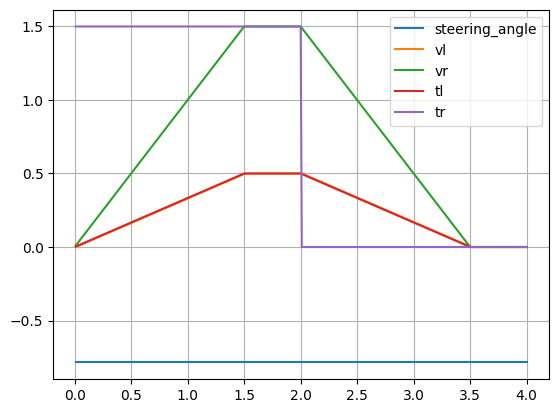

In [3]:
L = -1  # wheelbase in meters (negative = rear wheel steering)
B = 1  # track width in meters

robot = models.TrikeModel(L=L, B=B, steer_speed = math.radians(45))

angle_target = math.radians(-45)
robot.target_steer = angle_target
robot.steer.roc = 1e6

robot.target_velocity = 1.0

df1 = run_sim(robot, 2.0, dt=0.01)

robot.target_velocity = 0.0
df2 = run_sim(robot, 2.0, dt=0.01)

df = pd.concat([df1, df2])

df[["steering_angle","vl","vr","tl","tr"]].plot(grid = True)



<Axes: >

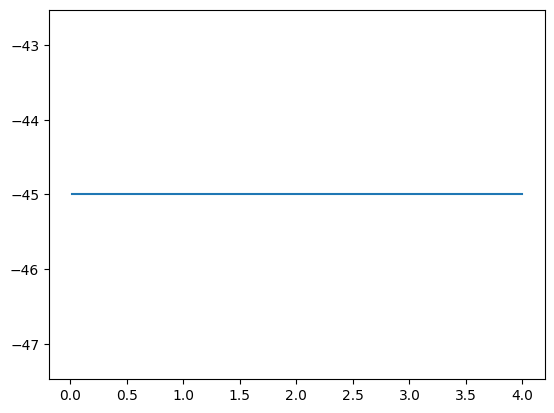

In [4]:
steering_angle_deg = df.steering_angle.apply(math.degrees)
steering_angle_deg.plot()

(-0.04972046034142793,
 1.0452296671686114,
 -0.07098675337408501,
 1.4907218758557852)

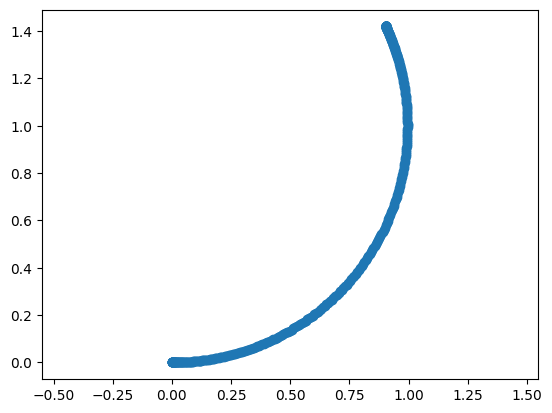

In [5]:

plt.plot(df.x, df.y, "o-")
plt.axis("equal")

## Wheels whith speed limit


<Axes: >

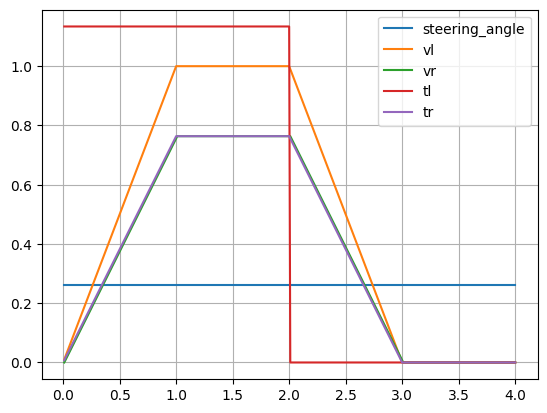

In [6]:
robot = models.TrikeModel(L=L, B=B, max_velocity=1.0)

angle_target = math.radians(15)
robot.steer.setpoint = angle_target

robot.steer.roc = 1e6




robot.target_velocity = 1.0

df1 = run_sim(robot, 2.0, dt=0.01)

robot.target_velocity = 0.0
df2 = run_sim(robot, 2.0, dt=0.01)

df = pd.concat([df1, df2])

df[["steering_angle","vl","vr","tl","tr"]].plot(grid = True)